In [1]:
# Data Loading and Exploring
import pandas as pd
import numpy as np

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Performance Masure Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Filter out Warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Projects/Loan_Default/credit_risk_dataset.csv")

In [3]:
# checking the data size
df.shape

(32581, 12)

In [4]:
# checking columns name
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
# finding datatypes for every column
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
# finding unique value for categorical columns
print('person_home_ownership: ',df['person_home_ownership'].unique())
print('loan_intent: ',df['loan_intent'].unique())
print('loan_grade: ',df['loan_grade'].unique())
print('cb_person_default_on_file: ',df['cb_person_default_on_file'].unique())

person_home_ownership:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:  ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file:  ['Y' 'N']


In [7]:
# checking the statstics 
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9.589371e+05,11.009286,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6.322087e+05,3.219474,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,5.000000e+04,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5.000000e+05,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8.000000e+05,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,1.220000e+06,13.460000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,1.000000,0.830000,30.000000


In [8]:
# counting the null values
df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [9]:
# dropping the missing values
df.dropna(inplace=True)
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,3500000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,100000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,550000,12.87,1,0.57,N,3


## Exploratory Data Analysis 

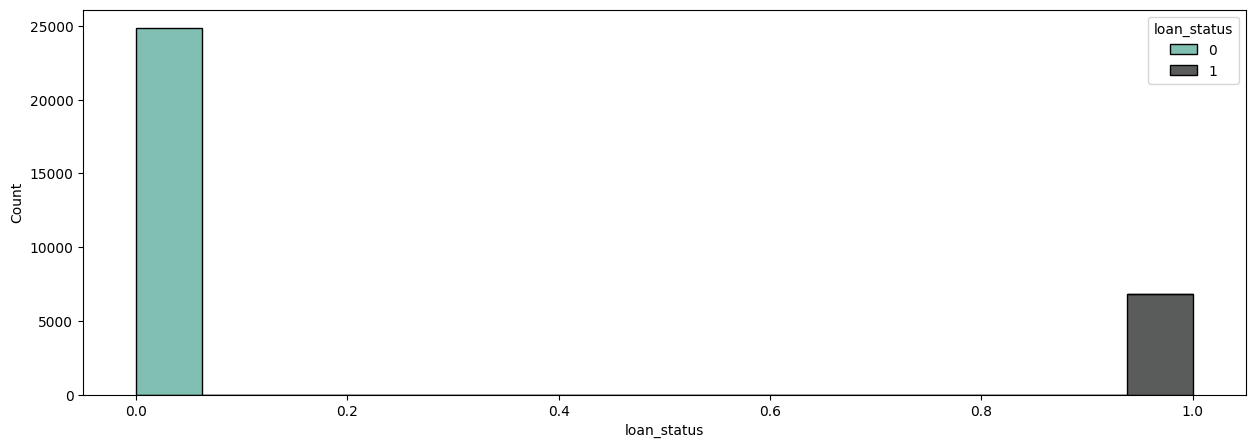

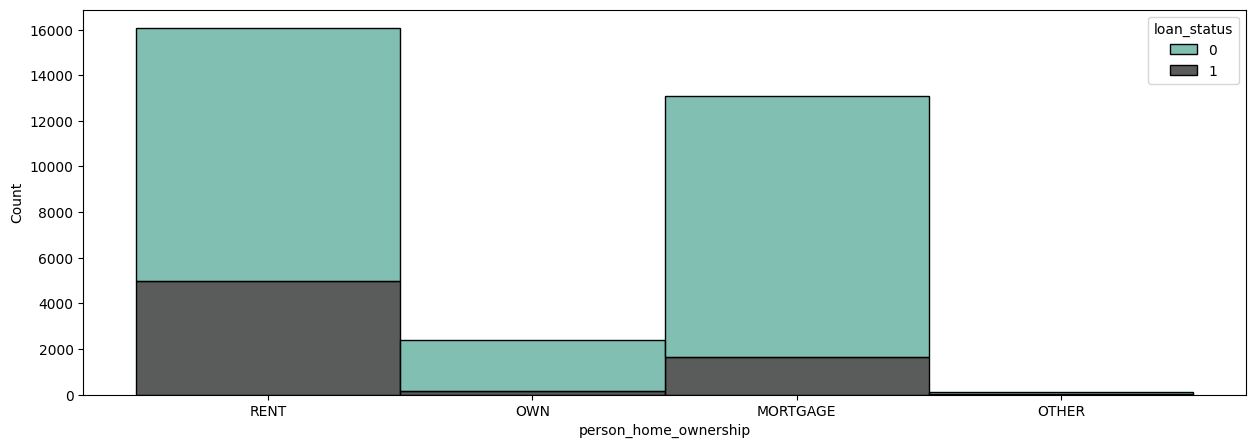

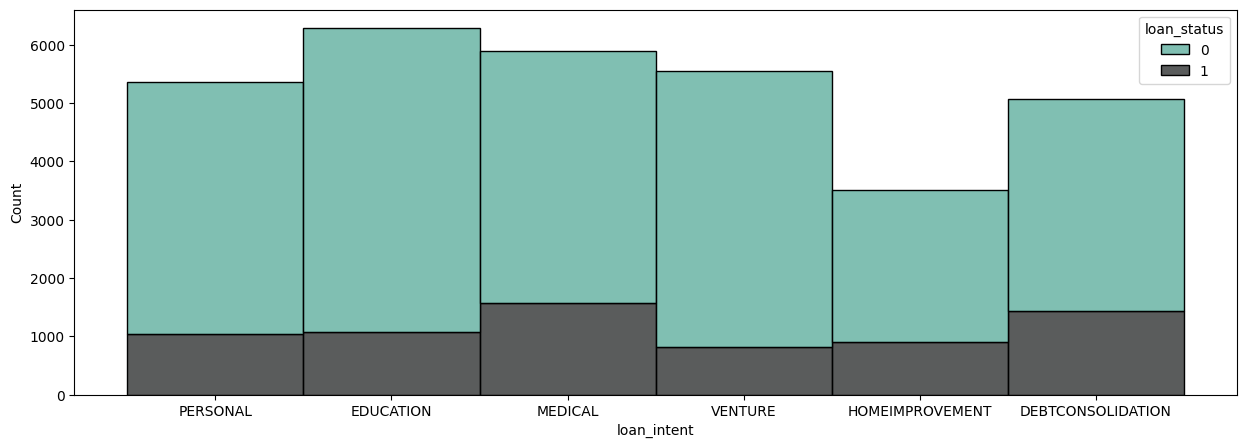

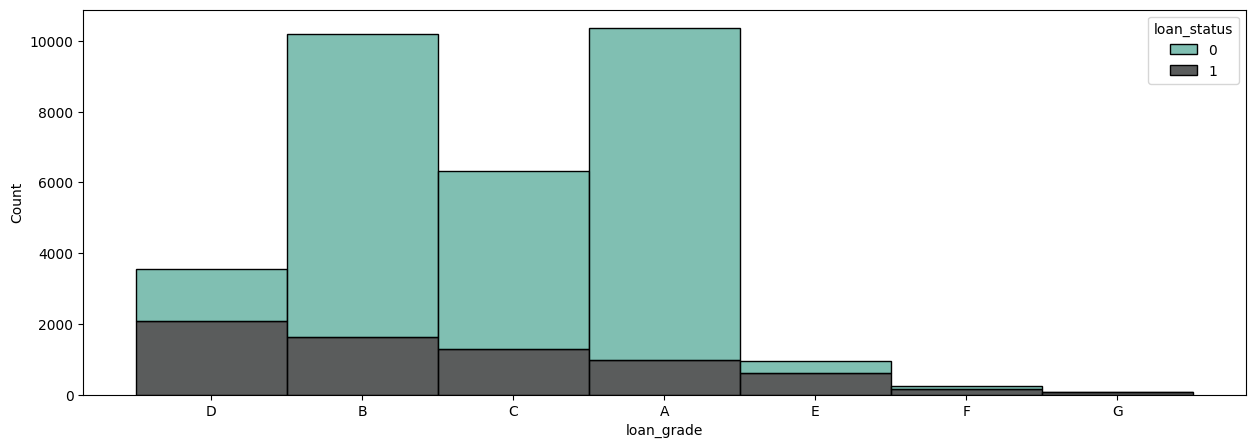

In [10]:
# ploting histplot to check data distrubution
columns = ['loan_status','person_home_ownership','loan_intent','loan_grade']

# for loop to itrate over columns list
for i in columns:
    plt.figure(figsize=(15,5))
    sns.histplot(x=i, data=df, palette='dark:#5A9_r',hue='loan_status',multiple='stack')
    plt.show()

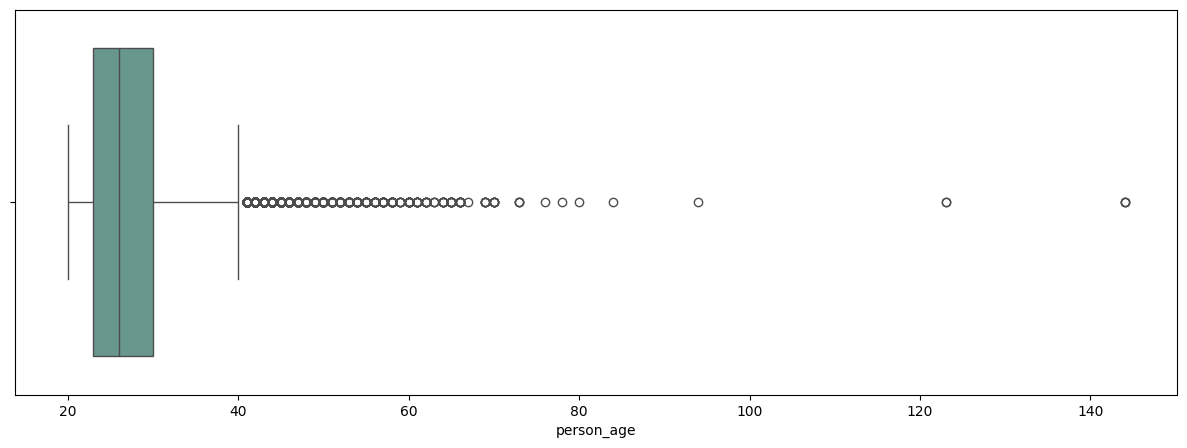

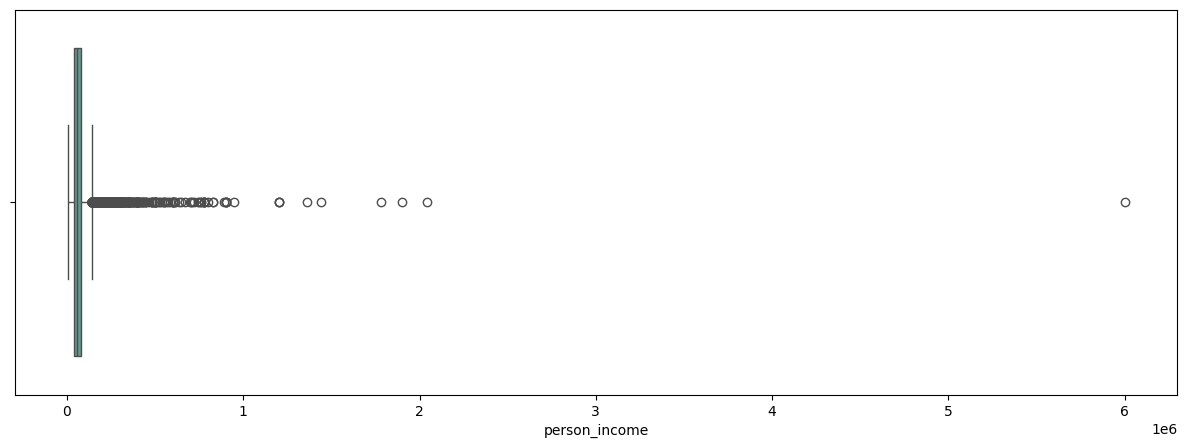

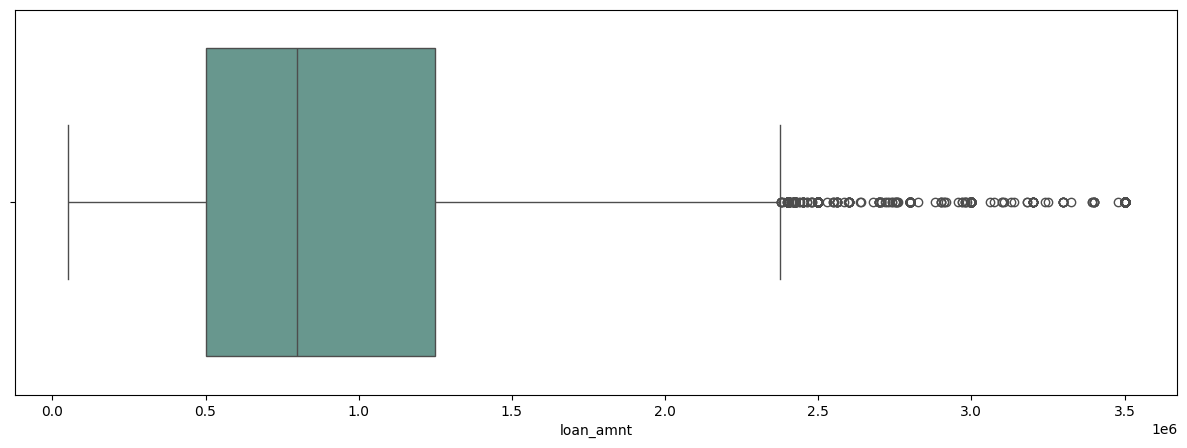

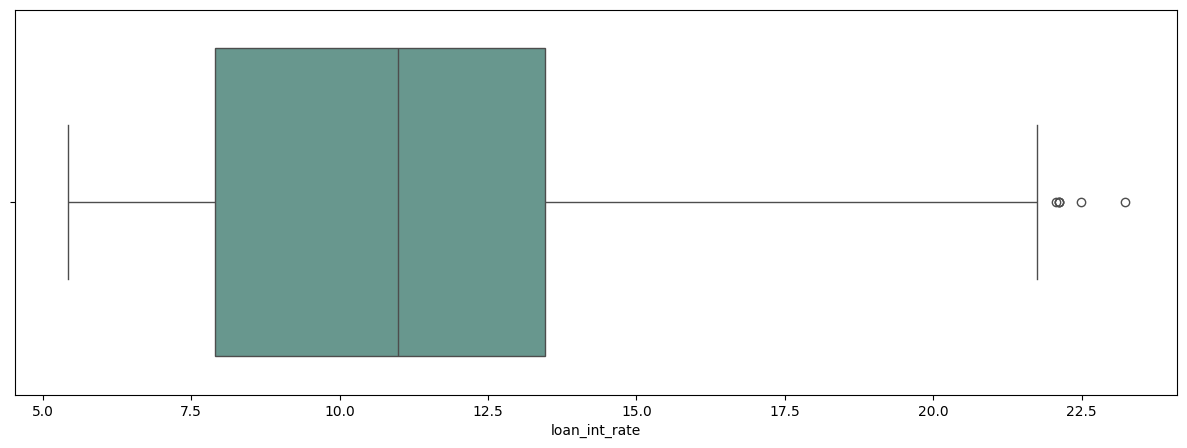

In [11]:
# ploting boxplot to chek outliers 
columns = ['person_age','person_income','loan_amnt','loan_int_rate']

# for loop to itrate over columns list
for i in columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df[i],color='#609f93')
    plt.show()

In [12]:
# selecting data with person_age is < 90
df = df[(df['person_age']<= 90)]

In this case we have age grater then or eqaul to 90 (ie.140).Thereofore,I have discarded the data which has person's age >=90

### Correlation analysis


<Axes: >

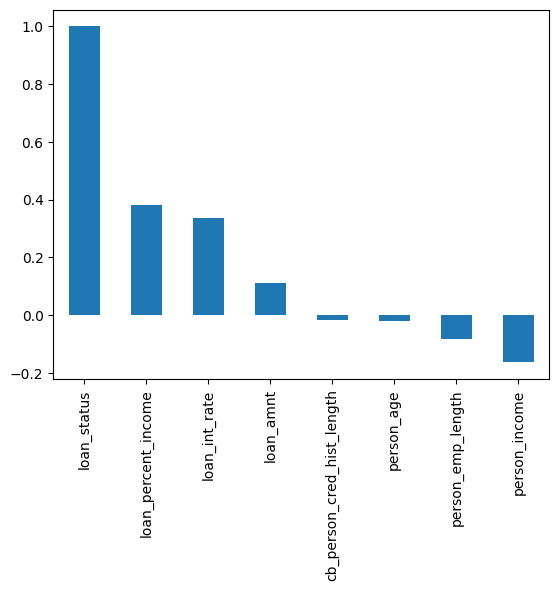

In [13]:
# selecting data with numerical values 
cor_df = df.select_dtypes(exclude=object)

# calculating correlation with loan_status column
correlation = cor_df.corr()['loan_status'].sort_values(ascending=False)

# Ploting bar plot
correlation.plot.bar()

<Axes: >

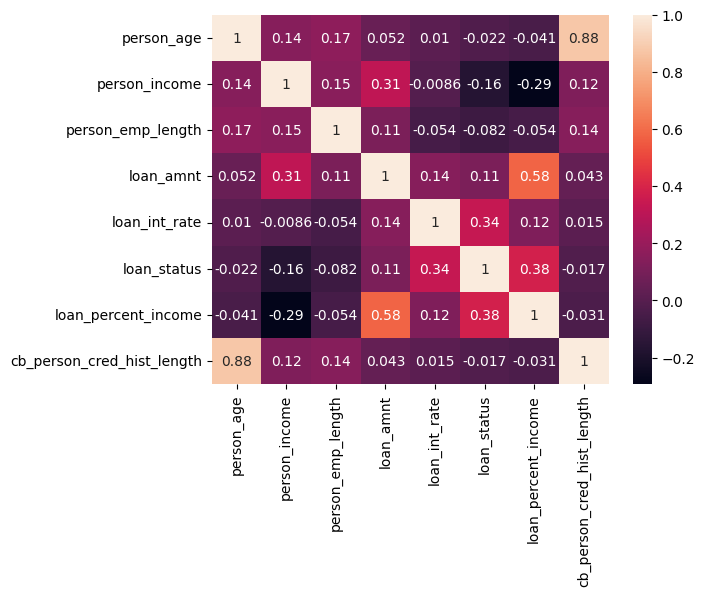

In [14]:
# creating heatmap to find colinearity between columns
sns.heatmap(cor_df.corr(),annot=True)

## Feature Selection & Train Test Split

In [15]:
# Selecting fearures 
selected_features = df

In [16]:
print(df.groupby('person_home_ownership')['person_home_ownership'].value_counts())
print(df.groupby('loan_intent')['loan_intent'].value_counts())

person_home_ownership
MORTGAGE    13091
OTHER         107
OWN          2410
RENT        16072
Name: count, dtype: int64
loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5896
PERSONAL             5368
VENTURE              5554
Name: count, dtype: int64


In [17]:
intent = {"DEBTCONSOLIDATION":5064,
"EDUCATION":6288,
"HOMEIMPROVEMENT":3510,
"MEDICAL":5896,
"PERSONAL":5368,
"VENTURE":5554}

ownership = {"MORTGAGE":13091,
"OTHER":107,
"OWN":2410,
"RENT":16072}

grade = {'A': 6, 
'B': 5, 
'C': 4,
'D': 3, 
'E': 2, 
'F': 1, 
'G': 0}


boolean={'N':0,
'Y':1}

In [18]:
# Performing encoding for loan_grade,loan_intent,person_home_ownership
selected_features['loan_grade'] = selected_features['loan_grade'].map(grade)
selected_features['loan_intent'] = selected_features['loan_intent'].map(intent)
selected_features['person_home_ownership'] = selected_features['person_home_ownership'].map(ownership)
# Performing binary encoding
selected_features['cb_person_default_on_file'] = selected_features['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

In [19]:
# Previewing the data
selected_features.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,16072,123.0,5368,3,3500000,16.02,1,0.59,1,3
1,21,9600,2410,5.0,6288,5,100000,11.14,0,0.10,0,2
2,25,9600,13091,1.0,5896,4,550000,12.87,1,0.57,0,3


In [20]:
# Selecting target and feature 
X = selected_features.drop(['loan_status'],axis=1)
y = selected_features['loan_status']

# performing standard scaler
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=33)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size=0.5, random_state=33)

## Random Forest Classifier

In [21]:
# creating randomforestclassifier
rf_classifier = RandomForestClassifier(max_depth=100,max_leaf_nodes=40,n_estimators=800)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=40, n_estimators=800)

In [22]:
# makeing predictions on X_test data
y_pred = rf_classifier.predict(X_test)

Accuracy score of the model 0.9248737373737373
Classification report 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3728
           1       0.94      0.70      0.80      1024

    accuracy                           0.92      4752
   macro avg       0.93      0.84      0.88      4752
weighted avg       0.93      0.92      0.92      4752



Text(0.5, 1.0, 'Confusion matrix: Random Forest')

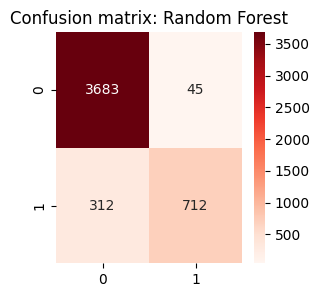

In [23]:
# Accuracy Score
print("Accuracy score of the model", accuracy_score(y_test,y_pred))

# classification report 
print("Classification report \n")
print(classification_report(y_test,y_pred))

# Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Random Forest')

In [24]:
# Calculating precision and recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred)
area_rf = auc(recall_rf, precision_rf)
print(area_rf)

0.8507619436605154


## Cross Validation

In [25]:
# creating RepeatedStratifiedKFold 
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

# Performing Cross-Validation
k_scores = cross_val_score(rf_classifier, X_val, y_val, scoring='accuracy', cv=cross_validation)
                           

# Accuracy Score
print('Accuracy_mean',np.mean(k_scores))
print('Accuracy_std',np.std(k_scores))

Accuracy_mean 0.9109843726964469
Accuracy_std 0.008932525313137835


## Model Tuning

In [26]:
# Creating parameter grid
parameter_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'n_estimators': [200, 500, 800],
    'max_leaf_nodes' : [20, 30, 40]
}

# Applying gridsearch methode 
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameter_grid, cv=3)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=100, max_leaf_nodes=40,
                                              n_estimators=800),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_leaf_nodes': [20, 30, 40],
                         'n_estimators': [200, 500, 800]})

In [28]:
# Best hyperparameters for randomforest 
grid_search.best_params_

{'bootstrap': True, 'max_depth': 80, 'max_leaf_nodes': 40, 'n_estimators': 200}

## SVM Classifier

In [29]:
# Creating LinearSVC 
svm_classifier = LinearSVC(max_iter=2000)
svm_classifier.fit(X_train,y_train)

LinearSVC(max_iter=2000)

In [30]:
# Predicting on X_test
y_pred = svm_classifier.predict(X_test)

Accuracy score of the model 0.8417508417508418
Classification report 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3728
           1       0.71      0.44      0.55      1024

    accuracy                           0.84      4752
   macro avg       0.79      0.70      0.73      4752
weighted avg       0.83      0.84      0.83      4752



Text(0.5, 1.0, 'Confusion matrix: Linear SVM')

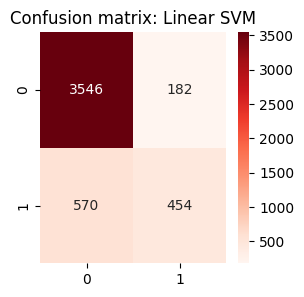

In [31]:
# Accuracy Score 
print("Accuracy score of the model", accuracy_score(y_test,y_pred))

# classification report 
print("Classification report \n")
print(classification_report(y_test,y_pred))

# Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Linear SVM')

In [32]:
# Calculating precision and recall
precision_lsvm, recall_lsvm, _ = precision_recall_curve(y_test, y_pred)
area_lsvm = auc(recall_lsvm, precision_lsvm)
print(area_lsvm)

0.6385726739684581


## Cross Validation

In [33]:
# creating RepeatedStratifiedKFold 
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

# Performing Cross-Validation
k_scores = cross_val_score(svm_classifier, X_val, y_val, scoring='accuracy', cv=cross_validation)

# Accuracy Score
print('Accuracy_mean',np.mean(k_scores))
print('Accuracy_std',np.std(k_scores))

Accuracy_mean 0.8516401297361049
Accuracy_std 0.009599009952937191


## Model Tuning

In [34]:
# Creating parameter grid
parameter_grid = {'class_weight':[None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 10}, {0: 1, 1: 100}]}

# Applying gridsearch methode 
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameter_grid, cv=3)

In [35]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=2000),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 10}, {0: 1, 1: 100}]})

In [36]:
# Best hyperparameters for LinearSVC 
grid_search.best_params_

{'class_weight': None}

### Comparing Randomforest Vs LinearSVC

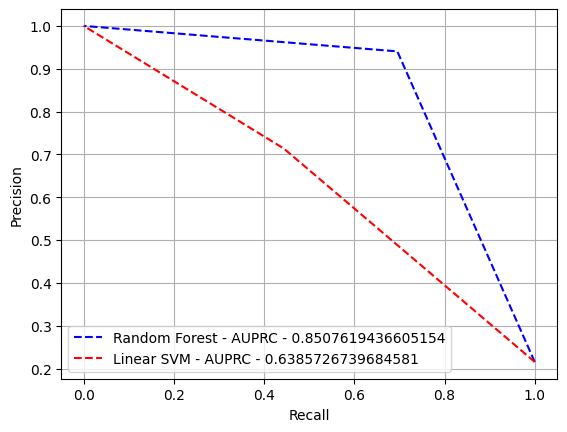

In [37]:
plt.plot(recall_rf, precision_rf, linestyle="--", color='b', label='Random Forest - AUPRC - ' + str(area_rf))
plt.plot(recall_lsvm, precision_lsvm, linestyle="--", color='r', label='Linear SVM - AUPRC - ' + str(area_lsvm))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()